# Supernovae Type 1A

Comparing observed $\mu$ and $z$ values to those predicted by the standard cosmological model given different values of $\Omega_{Matter}$.

In [1]:
#import the necessary packages
from numpy import *
from pylab import *
from scipy.integrate import quad

In [2]:
#define the equations

# Integrand for luminosity distance
def f(x,om):
    return 1.0/sqrt(om*pow(1.0+x,3.0)+1.0-om)

# Luminosity distance
def dl(z,om,h0):
    return 299792.458*(1+z)*quad(f,0.0,z,args=(om))[0]/h0

# Distance modulus
def mu(z,om,h0):
    return 5.0*log10(dl(z,om,h0))+25.0

In [5]:
# Read the observed distance moduli (data input from txt file)
zo,mo=loadtxt('datafile5.txt',unpack=True,skiprows=22,usecols=[2,3])

In [6]:
# Calculate the theoretical distance moduli
zc=arange(0.001,2.0,0.001)
m1=[mu(z,0.0,71.0) for z in zc]
m2=[mu(z,1.0,71.0) for z in zc]
m3=[mu(z,0.3,71.0) for z in zc]

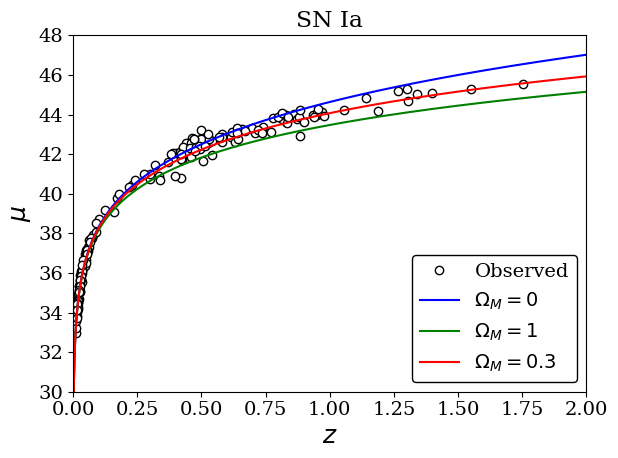

In [7]:
# Figure settings
plt.rcParams.update({'font.family':'serif','font.size':14,'text.usetex':False,'legend.framealpha':None,'legend.edgecolor':'black'})

# Plot the results and save the figure
plot(zo,mo,'ko',mfc='w')
plot(zc,m1,'b-',zc,m2,'g-',zc,m3,'r-')
xlim(0.0,2.0)
ylim(30.0,48.0)
xlabel('$z$',fontsize=18)
ylabel(r'$\mu$',fontsize=18)
legend(['Observed',r'$\Omega_M = 0$',r'$\Omega_M = 1$',r'$\Omega_M = 0.3$'],loc=4)
title('SN Ia')
tight_layout()
savefig('SNIa.jpg',dpi=300,bbox_inches='tight')
show()